In [46]:
import matplotlib.pyplot as plt
import numpy as np
import math
from math import log

filePath = "arnetminer/AP_train.txt"
#filePath = "sample-data"
file = open(filePath,'r')

references={}         #{index, #references}
citations={}          #{index, #citations}
venue_publications={} #{venue, list(publication)}

for line in file:    
        
    # fetch publication id    
    if line.startswith("#index"):
        index = line[6:].strip()       

    # create a list of publications for each venue in dataset
    if line.startswith("#c"):
        venue = line[2:].strip()
        if venue != "":            
            if venue_publications.get(venue) is None:
                venue_publications[venue] = [index]
            else:
                venue_publications[venue] = venue_publications.get(venue) + [index]
    
    # count the no. of references and citations for each publication
    if line.startswith("#%"):
        reference = line[2:].strip()
        if reference != "":            
            if references.get(index) is None:
                references[index] = 1
            else:
                references[index] = references.get(index) + 1
            
            if citations.get(reference) is None:
                citations[reference] = 1
            else:
                citations[reference] = citations[reference] + 1                       
                            
file.close()

In [47]:
referencesPerPublication = {}
maxReferencePublication = ""
maxCount = 0

# calculate no. of references per publication
for index, count in references.items():    
    if count > maxCount:
        maxCount = count;
        maxReferencePublication = index
        
    if referencesPerPublication.get(count) is None:
        referencesPerPublication[count] = 1
    else:
        referencesPerPublication[count] = referencesPerPublication.get(count)+1

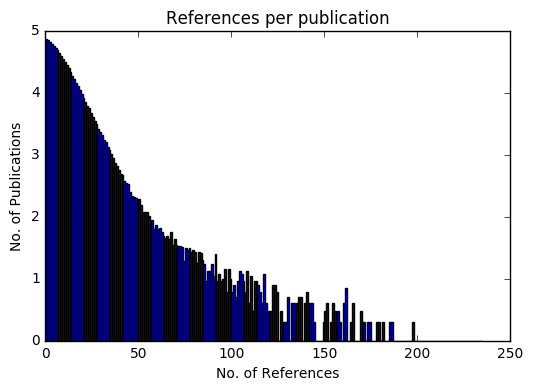

The publication with largest no. of references : 719353
Largest reference count for a single publication : 772


In [48]:
yvalues = np.array(list(referencesPerPublication.values()))
xvalues = np.array(list(referencesPerPublication.keys()))

logValues=[log(value,10)for value in yvalues]
xaxis=np.arange(len(xvalues))
plt.bar(xaxis,logValues,1,color="b")
plt.ylabel('No. of Publications')
plt.xlabel('No. of References')
plt.title('References per publication') 
plt.show()

print("The publication with largest no. of references :", maxReferencePublication)
print("Largest reference count for a single publication :", maxCount)

In [49]:
citationsPerPublication = {}
maxCitationPublication = ""
maxCount = 0

# calculate no. of citation per publication
for index, count in citations.items():    
    if count > maxCount:
        maxCount = count;
        maxCitationPublication = index
        
    if citationsPerPublication.get(count) is None:
        citationsPerPublication[count] = 1
    else:
        citationsPerPublication[count] = citationsPerPublication.get(count)+1

# get publications with 0 citations        
for index in references.keys():
    if index not in citations.keys():
        if citationsPerPublication.get(0) is None:
            citationsPerPublication[0] = 1
        else:
            citationsPerPublication[0] = citationsPerPublication.get(0) + 1

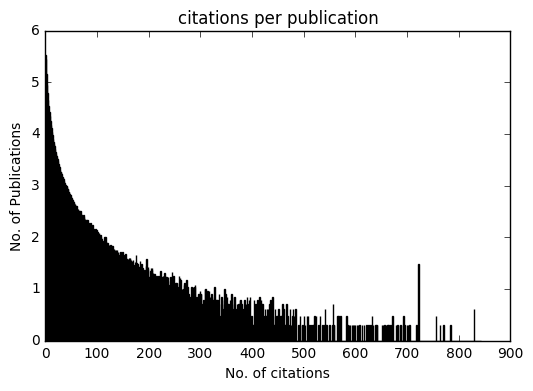

The publication with largest no. of citations : 408396
Largest Citation count for a single publication : 7753


In [50]:
yvalues = np.array(list(citationsPerPublication.values()))
xvalues = np.array(list(citationsPerPublication.keys()))

logValues=[log(value,10)for value in yvalues]
xaxis=np.arange(len(xvalues))
plt.bar(xaxis,logValues,1,color="b")
plt.ylabel('No. of Publications')
plt.xlabel('No. of citations')
plt.title('citations per publication') 
plt.show()

print("The publication with largest no. of citations :", maxCitationPublication)
print("Largest Citation count for a single publication :", maxCount)

In [51]:
impact_factor={}
maxImpactFactor=0
maxImpactFactorVenue=""
impactFactorPerVenue={}

# calculate impact factor for each venue in dataset
for venue, publications in venue_publications.items():
    totalCitations=0
    
    # calculate impact factor
    for p in publications:
        if citations.get(p) is not None:
            totalCitations += citations.get(p)
    impactFactor = float(totalCitations/len(publications))        
    impact_factor[venue] = impactFactor
    
    # get largest impact factor and coressponding venue
    if impact_factor.get(venue) > maxImpactFactor:
        maxImpactFactor = impact_factor.get(venue)
        maxImpactFactorVenue = venue
        
    # calculate impact factor per venue to plot histogram
    if impactFactorPerVenue.get(impactFactor) is None:
        impactFactorPerVenue[impactFactor] = 1
    else:
        impactFactorPerVenue[impactFactor] = impactFactorPerVenue.get(impactFactor)+1        

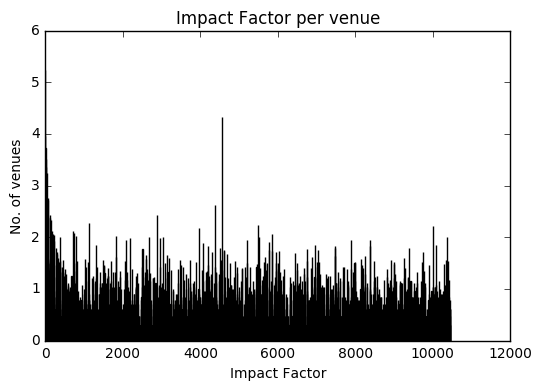

Highest Impact Factor :  7753.0
Venue with highest Impact Factor :  Computers and Intractability: A Guide to the Theory of NP-Completeness


In [52]:
yvalues = np.array(list(impactFactorPerVenue.values()))
xvalues = np.array(list(impactFactorPerVenue.keys()))

logValues=[log(value,10)for value in yvalues]
xaxis=np.arange(len(xvalues))
plt.bar(xaxis,logValues,1,color="b")
plt.ylabel('No. of venues')
plt.xlabel('Impact Factor')
plt.title('Impact Factor per venue') 
plt.show() 

print("Highest Impact Factor : ", maxImpactFactor)
print("Venue with highest Impact Factor : ", maxImpactFactorVenue)

Yes, I do beleive this number. Since, this venue has just 1 publication, which is the article with highest citation count. So, this venue must have highest impact factor.

In [53]:
impactFactorPerVenue.clear()
limited_impact_factor={}

# get impact factor for each venue with atleast 10 publications
for venue, impactFactor in impact_factor.items():
    if len(venue_publications.get(venue))>=10:
        limited_impact_factor[venue] = impactFactor

# calculate impact factor per venue to plot histogram
for venue, impactFactor in limited_impact_factor.items():
    if impactFactorPerVenue.get(impactFactor) is None:
        impactFactorPerVenue[impactFactor] = 1
    else:
        impactFactorPerVenue[impactFactor] = impactFactorPerVenue.get(impactFactor)+1

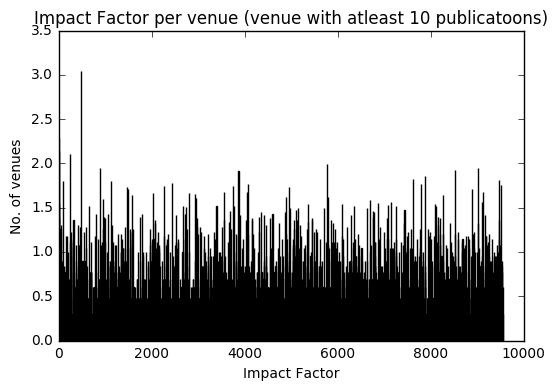

In [54]:
yvalues = np.array(list(impactFactorPerVenue.values()))
xvalues = np.array(list(impactFactorPerVenue.keys()))

logValues=[log(value,10)for value in yvalues]
xaxis=np.arange(len(xvalues))
plt.bar(xaxis,logValues,1,color="b")
plt.ylabel('No. of venues')
plt.xlabel('Impact Factor')
plt.title('Impact Factor per venue (venue with atleast 10 publicatoons)') 
plt.show()

Differences in histogram:

When we only consider the venues with atleast 10 publications, the range of "impact factor" drops considerably. This is because the sum of citations for that venue would be divided by atleast a factor of 10 to compute corresponding impact factor.

In [55]:
# list of publication for the venue with highest impact factor
maxImpactFactorVenueCitations=[]
print("Publication ID \t \t Citation Count")        
for p in venue_publications.get(maxImpactFactorVenue):
    print(p, "\t \t \t", 0 if citations.get(p) is None else citations.get(p))  
    maxImpactFactorVenueCitations.append(citations.get(p))    

Publication ID 	 	 Citation Count
408396 	 	 	 7753


In [56]:
maxImpactFactorVenueCitations = np.array(list(maxImpactFactorVenueCitations))
print("Median no. of citations for venue with highest impact factor :", np.percentile(maxImpactFactorVenueCitations, 50))

Median no. of citations for venue with highest impact factor : 7753.0


The mean(Impact Factor) and median for the venue with highest impact factor is the same. This is because, this venue has only 1 publication.